<a href="https://colab.research.google.com/github/mjh09/aligulac_project/blob/master/Starcraft_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import and alias libraries
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import numpy as np

##Data wrangling

In [0]:
# Read in CSV after uploading from local files
period_df = pd.read_csv('period.csv')

# Sort Dataframe by 'id' column
period_df = period_df.sort_values(by='id', ascending=False)

# Narrow DatFram to exclude unwanted columns
period_df = period_df[['id', 'num_retplayers','num_newplayers']]

# Rename columns
period_df = period_df.rename(index=str, 
                             columns={'num_retplayers':'returning players',
                                      'num_newplayers': 'new players'})

# Narrow DataFrame to exclude unused rows
period_df = period_df[period_df['id'].between(0,242, inclusive=True)]

## Setting variables

In [0]:
# Variable DataFrame excluding the year 2010
total_avg = period_df[period_df['id'].between(23,242, inclusive=True)]

# Variable storing the average of 'returning player' column
total_av = total_avg['returning players'].mean()

# Variable storing the standard deviation of the population
std = np.std(total_avg['returning players'])

##Overview graph

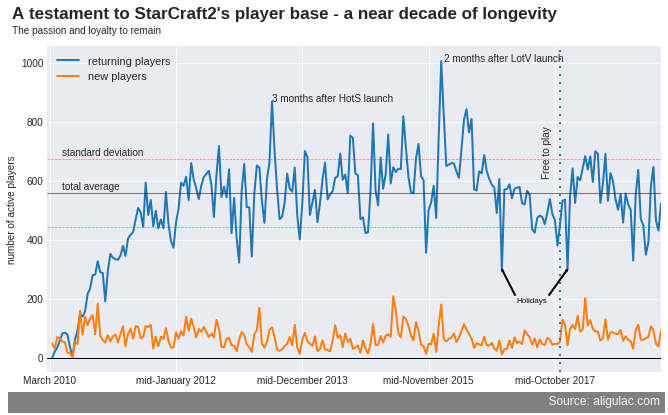

In [0]:
# Setting style of graph to use
style.use('seaborn-darkgrid')

# Variable storing DataFrame graph
period_graph = period_df.plot(x ='id', figsize=(11,6), linewidth=2)

# Setting legend parameters
plt.legend(loc='upper left', prop={'size':11}, frameon=False);

# Removing x-axis label, and declaring the y-axis label
period_graph.xaxis.label.set_visible(False)
plt.ylabel("number of active players", size=10);

# Setting tick parameter with custom for x-axis
period_graph.tick_params(axis = 'both', which = 'major', labelsize =10)
period_graph.set_xticklabels(labels =[0,'March 2010','mid-January 2012',
                                      'mid-December 2013','mid-November 2015',
                                      'mid-October 2017']);
period_graph.set_xlim(left =-1);

# Signature bar, Title and horizontal line on x-axis
period_graph.text(x=-15,y=-160,
                 s='                                                                                                                                                               Source: aligulac.com',
                 fontsize=12, color='#f0f0f0', backgroundcolor='grey');
period_graph.text(x=-15,y=1150,s='A testament to StarCraft2\'s player base - a near decade of longevity',
                 fontsize=17, weight='bold', alpha=1);
period_graph.text(x=-15,y=1100,s='The passion and loyalty to remain');
period_graph.axhline(y=0, color='black', linewidth=1, alpha=1.0)

# Vertical line and text at specific index
plt.axvline(202, lw=2, dashes=(1,3));
period_graph.text(195, 760, s='Free to play' ,size=10, rotation=90)

# Horizontal line and text for population average and standard deviation
plt.axhline(y=total_av, color='black', linewidth=1, alpha=.5)
plt.axhline(y=total_av+std, color='red', linewidth=.7,linestyle='--', alpha=.5)
plt.axhline(y=total_av-std, color='red', linewidth=.7,linestyle='--', alpha=.5)
plt.annotate('standard deviation', xy=(5,686), size=10)
plt.annotate('total average', xy=(5,570), size=10)

# Two standard deviations, commented out
#plt.axhline(y=total_av+(std*2), color='red', linewidth=.7,linestyle='--')
#plt.axhline(y=total_av-(std*2), color='red', linewidth=.7,linestyle='--')


# Text annotations
plt.annotate('2 months after LotV launch',
            xy=(156,1006),size=10);
plt.annotate('3 months after HotS launch',
            xy=(88,869),size=10);
plt.annotate('Holidays',
            xy=(179,300), xycoords='data',
            xytext=(45, -35), textcoords='offset points',
            arrowprops=dict(facecolor='black', headwidth=2, headlength=2, width=1),
            horizontalalignment='right', verticalalignment='bottom',size=8, alpha=.7);
plt.annotate('Holidays',
            xy=(205,300), xycoords='data',
            xytext=(-20, -35), textcoords='offset points',
            arrowprops=dict(facecolor='black', headwidth=2, headlength=2, width=1),
            horizontalalignment='right', verticalalignment='bottom',size=8,alpha=.7);


##Data wrangling for yearly intervals

In [0]:
# Custom splits at best percieved intervals
twentyten_df = period_df[period_df['id'].between(0,23, inclusive=True)]
twentyeleven_df = period_df[period_df['id'].between(24,49, inclusive=True)]
twentytwelve_df = period_df[period_df['id'].between(50,75, inclusive=True)]
twentythirteen_df = period_df[period_df['id'].between(76,101, inclusive=True)]
twentyfourteen_df = period_df[period_df['id'].between(102,127, inclusive=True)]
twentyfifteen_df = period_df[period_df['id'].between(128,153, inclusive=True)]
twentysixteen_df = period_df[period_df['id'].between(154,179, inclusive=True)]
twentyseventeen_df = period_df[period_df['id'].between(180,205, inclusive=True)]
twentyeighteen_df = period_df[period_df['id'].between(206,231, inclusive=True)]
twentynineteen_df = period_df[period_df['id'].between(230,242, inclusive=True)]

In [0]:
# List of year DataFrames for iteration
dfs = [twentyten_df,twentyeleven_df,twentytwelve_df,
       twentythirteen_df, twentyfourteen_df,
       twentyfifteen_df, twentysixteen_df, twentyseventeen_df,
       twentyeighteen_df,twentynineteen_df]

In [0]:
# Variable list of year DataFrame means filled with for-loop
newplayers = []
retplayers = []
for df in dfs:
  newplayers.append(df['new players'].mean())
  retplayers.append(df['returning players'].mean())

##Year by Year average graph

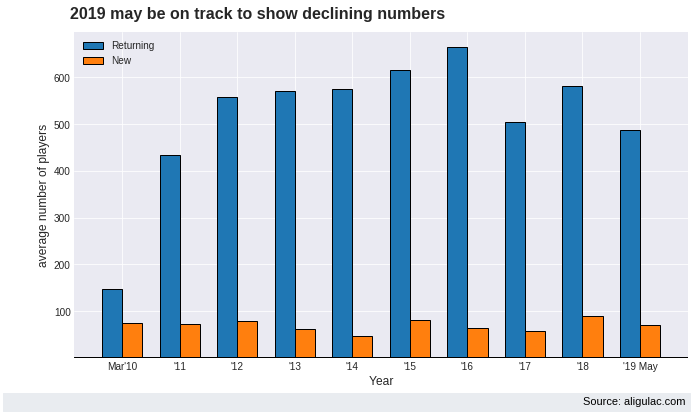

In [0]:
# Set style
style.use('seaborn-darkgrid')

# Set subplot
fig, ax = plt.subplots(figsize=(11,6))

# Custom Variables
ind = np.arange(len(newplayers))
width = 0.35

# Bar graph
rects1 = ax.bar(ind - width/2, retplayers, width, label='Returning', edgecolor='black')
rects2 = ax.bar(ind + width/2, newplayers, width,label='New', edgecolor='black')

# Legend
ax.legend(loc='upper left', prop={'size':10}, frameon=False);

# x,y  axis settings
ax.set_xlabel('Year', size=12);
ax.set_xticks(ind);
ax.set_xticklabels(('Mar\'10','\'11','\'12','\'13','\'14','\'15',
                    '\'16','\'17','\'18','\'19 May'), size=10);
ax.set_yticklabels(('',100,200,300,400,500,600,700),size=10)
ax.set_ylabel('average number of players', size=12);

# Horizontal line on x-axis
ax.axhline(0.3, color='k', linewidth=3);

# Title
ax.text(x=-2,y=725,s='              2019 may be on track to show declining numbers',
                 fontsize=16, weight='bold',alpha=1);

# Signature line
ax.text(x=-2,y=-100,
                 s='                                                                                                                                                                                                Source: aligulac.com',
                 fontsize=11, color='#000000', backgroundcolor='#e9ecf0');

##Data Wrangling for Year split

In [0]:
# Custom splits
ftwentone = period_df[period_df['id'].between(24,36, inclusive=True)]
stwentone = period_df[period_df['id'].between(37,49, inclusive=True)]
ftwenttwo = period_df[period_df['id'].between(50,62, inclusive=True)]
stwenttwo = period_df[period_df['id'].between(63,75, inclusive=True)]
ftwentthree = period_df[period_df['id'].between(76,88, inclusive=True)]
stwentthree = period_df[period_df['id'].between(89,101, inclusive=True)]
ftwentfour = period_df[period_df['id'].between(102,114, inclusive=True)]
stwentfour = period_df[period_df['id'].between(115,127, inclusive=True)]
ftwentfive = period_df[period_df['id'].between(128,140, inclusive=True)]
stwentfive = period_df[period_df['id'].between(141,153, inclusive=True)]
ftwentsix = period_df[period_df['id'].between(154,166, inclusive=True)]
stwentsix = period_df[period_df['id'].between(167,179, inclusive=True)]
ftwentseven = period_df[period_df['id'].between(180,192, inclusive=True)]
stwentseven = period_df[period_df['id'].between(193,205, inclusive=True)]
ftwenteight = period_df[period_df['id'].between(206,218, inclusive=True)]
stwenteight = period_df[period_df['id'].between(219,231, inclusive=True)]

In [0]:
# Custom empty DataFrame so graph will work 
oa =np.array([0])
zdf = pd.DataFrame(oa, columns=['returning players'])

In [0]:
# List of DataFrames for iteration
fhalf = [ftwentone,ftwenttwo, ftwentthree,ftwentfour,ftwentfive,ftwentsix,
        ftwentseven,ftwenteight, twentynineteen_df]
shalf = [stwentone,stwenttwo, stwentthree,stwentfour,stwentfive,stwentsix,
        stwentseven,stwenteight,zdf]

In [0]:
# Variable list filled with for-loop
first_half = []
second_half = []
for df in fhalf:
  first_half.append(df['returning players'].mean())

for df in shalf:
  second_half.append(df['returning players'].mean())

## Year split graph

No handles with labels found to put in legend.


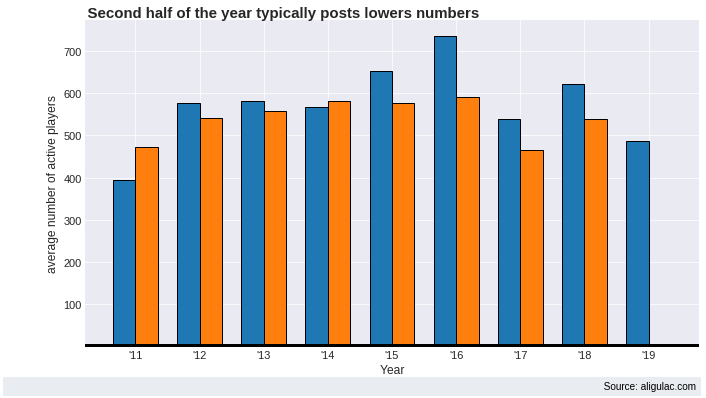

In [0]:
# Style
style.use('seaborn-darkgrid')

# Variables for graph
fig, ax = plt.subplots(figsize=(11,6))
ind = np.arange(len(first_half))
width = 0.35

# Legend
ax.legend(loc='upper left', prop={'size':11}, frameon=False);

# Bar graph
rects1 = ax.bar(ind - width/2, first_half, width, label='fist half', edgecolor='black')
rects2 = ax.bar(ind + width/2, second_half, width,label='second half', edgecolor='black')

# x, y axis settings
ax.set_xticks(ind);
ax.set_xticklabels(('\'11','\'12','\'13','\'14','\'15','\'16','\'17','\'18','\'19'), size=11);
ax.set_xlabel('Year', size=12);
ax.set_yticklabels(('',100,200,300,400,500,600,700),size=11);
ax.set_ylabel('average number of active players', size=12);

# Horizontal line on x-axis
ax.axhline(0.3, color='k', linewidth=5);

# Title
ax.text(x=-1,y=780,s='    Second half of the year typically posts lowers numbers',
                 fontsize=15, alpha=1, weight='bold');

# Signature line
ax.text(x=-2,y=-100,
                 s='                                                                                                                                                                                                                         Source: aligulac.com',
                 fontsize=10, color='#000000', backgroundcolor='#e9ecf0');